### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', None) # see all column and their values
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [87]:
coupons_data_original = pd.read_csv('data/coupons.csv')
coupons_data_original.head()
# coupons_data_original.info()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64


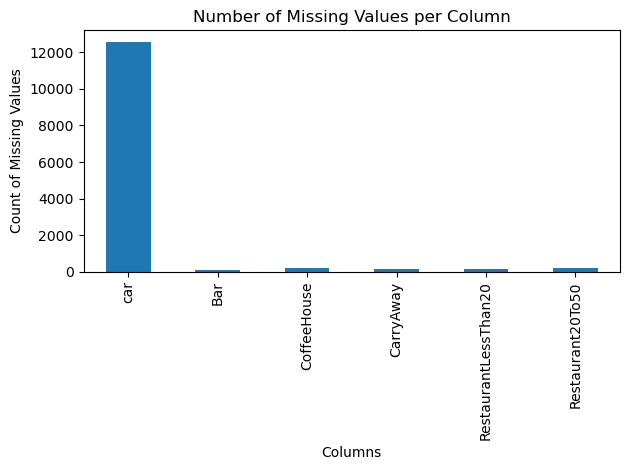

In [ ]:
null_counts = coupons_data_original.isna().sum()
missing_values = null_counts[null_counts > 0]
print(missing_values)
missing_values.plot(kind='bar')
plt.title('Number of Missing Values per Column')
plt.ylabel('Count of Missing Values')
plt.xlabel('Columns')
plt.tight_layout()
plt.savefig('images/missing_values_plot.png')
plt.show()
#1 car column
# coupons_data_original['car'].value_counts(dropna=False) 
# it is clear that car column has ~99% missing values. I will drop this column

#2 Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50
# print(coupons_data_original['Bar'].value_counts(dropna=False))
# print(coupons_data_original['CoffeeHouse'].value_counts(dropna=False))
# print(coupons_data_original['CarryAway'].value_counts(dropna=False))
# print(coupons_data_original['RestaurantLessThan20'].value_counts(dropna=False))
# print(coupons_data_original['Restaurant20To50'].value_counts(dropna=False))

# print(f"Bar={coupons_data_original['Bar'].dtype}")
# print(f"CoffeeHouse={coupons_data_original['CoffeeHouse'].dtype}")
# print(f"CarryAway={coupons_data_original['CarryAway'].dtype}")
# print(f"RestaurantLessThan20={coupons_data_original['RestaurantLessThan20'].dtype}")
# print(f"Restaurant20To50={coupons_data_original['Restaurant20To50'].dtype}")

3. Decide what to do about your missing data -- drop, replace, other...

In [89]:
# cleaning columns with missing values
columns_to_fillna = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
columns_to_drop = ['car']
coupons_data_cleaned = coupons_data_original.drop(columns_to_drop, axis=1)
coupons_data_cleaned[columns_to_fillna] = coupons_data_cleaned[columns_to_fillna].fillna('never')
coupons_data_cleaned.isna().sum()
# coupons_data_cleaned.info()


# clearning age column because it contains alpha numeric values
# i am updating 50plus to 51 and below21 to 20
# make sure you convert all the string to int. i.e. '20' to 20
coupons_data_cleaned['age'] = coupons_data_cleaned['age'].replace('50plus', '51')
coupons_data_cleaned['age'] = coupons_data_cleaned['age'].replace('below21', '20')
coupons_data_cleaned['age'] = coupons_data_cleaned['age'].astype('int64')

4. What proportion of the total observations chose to accept the coupon?



In [90]:
total_rows = len(coupons_data_cleaned)
number_of_accepts = len(coupons_data_cleaned.query('Y == 1'))
number_of_rejects = len(coupons_data_cleaned.query('Y == 0'))

print(f"Total drivers choose to accept: {round((number_of_accepts/total_rows)*100, 2)}%")

Total drivers choose to accept: 56.84%


5. Use a bar plot to visualize the `coupon` column.

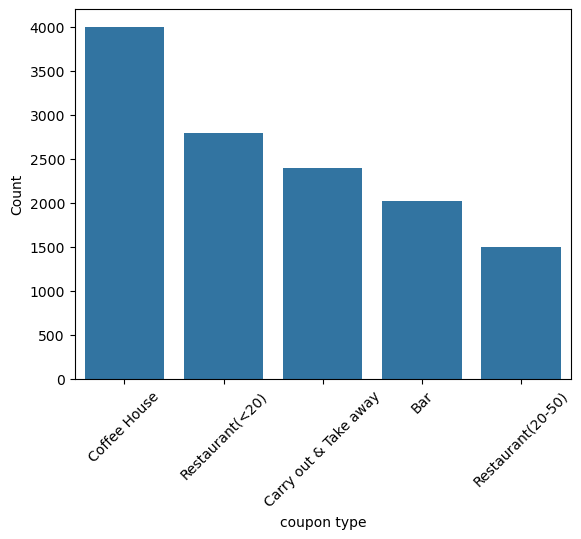

In [91]:
coupons_data = coupons_data_cleaned['coupon'].value_counts()
plot = sns.barplot(x=coupons_data.index, y=coupons_data.values)
plot.set(xlabel='coupon type', ylabel='Count')
plot.tick_params(axis='x', labelrotation=45)
chart = plot.get_figure()
chart.savefig('images/coupon_counts.png',bbox_inches='tight')

6. Use a histogram to visualize the temperature column.

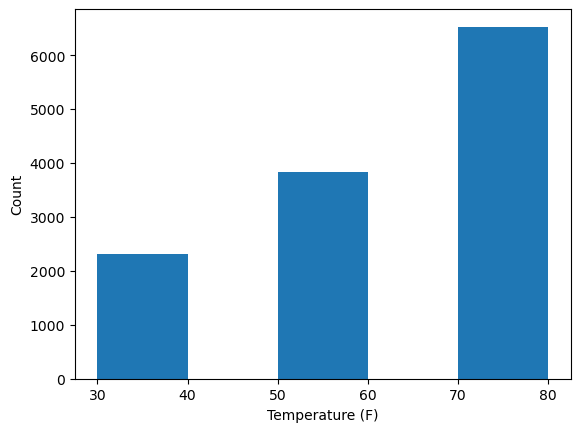

<Figure size 640x480 with 0 Axes>

In [106]:
plt.hist(coupons_data_cleaned['temperature'], bins=5)
plt.xlabel('Temperature (F)')
plt.ylabel('Count')
plt.show()
plt.savefig('images/temperature_histogram.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [93]:
bar_coupon_df = coupons_data_cleaned.query('coupon == "Bar"')

2. What proportion of bar coupons were accepted?


Total drivers choose to accept: 41.0%
Total drivers choose to reject: 59.0%


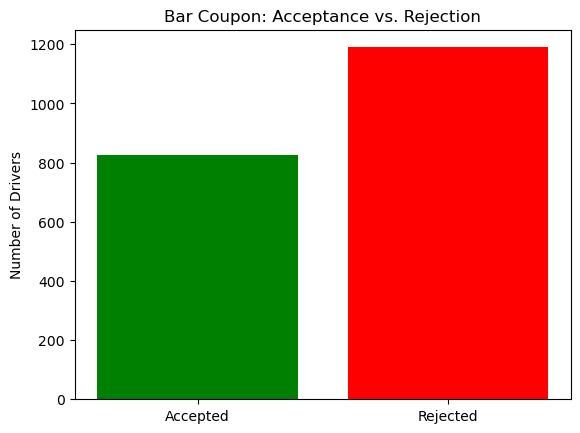

In [107]:
total_bar_coupon_rows = len(bar_coupon_df)
number_of_bar_coupon_accepts = len(bar_coupon_df.query('Y == 1'))
number_of_bar_coupon_rejects = len(bar_coupon_df.query('Y == 0'))

print(f"Total drivers choose to accept: {round((number_of_bar_coupon_accepts/total_bar_coupon_rows)*100, 2)}%")
print(f"Total drivers choose to reject: {round((number_of_bar_coupon_rejects/total_bar_coupon_rows)*100, 2)}%")

labels = ['Accepted', 'Rejected']
values = [number_of_bar_coupon_accepts, number_of_bar_coupon_rejects]

plt.bar(labels, values, color=['green', 'red'])
plt.title('Bar Coupon: Acceptance vs. Rejection')
plt.ylabel('Number of Drivers')
plt.savefig('images/bar_coupon_acceptance_vs_rejection.png')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Total drivers accepted bar coupon with less than 3 visits to bar: 81.5%
Total drivers accepted bar coupon with more than 3 visits to bar: 18.5%


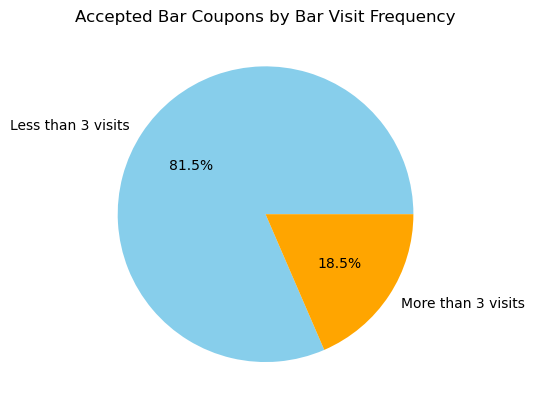

In [108]:
# drivers with less than 3 visits to bar
drivers_with_less_than_3_visits_to_bar = bar_coupon_df.query('Bar.isin(["never", "less1", "1~3"])')
# drivers with more than 3 visits to bar
drivers_with_more_than_3_visits_to_bar = bar_coupon_df.query('Bar.isin(["4~8", "gt8"])')

drivers_with_less_than_3_visits_to_bar_that_accepted = len(drivers_with_less_than_3_visits_to_bar.query('Y == 1'))
drivers_with_more_than_3_visits_to_bar_that_accepted = len(drivers_with_more_than_3_visits_to_bar.query('Y == 1'))

total_visits_accepts = drivers_with_less_than_3_visits_to_bar_that_accepted + drivers_with_more_than_3_visits_to_bar_that_accepted

print(f"Total drivers accepted bar coupon with less than 3 visits to bar: {round((drivers_with_less_than_3_visits_to_bar_that_accepted/total_visits_accepts)*100, 2)}%")
print(f"Total drivers accepted bar coupon with more than 3 visits to bar: {round((drivers_with_more_than_3_visits_to_bar_that_accepted/total_visits_accepts)*100, 2)}%")
labels = ['Less than 3 visits', 'More than 3 visits']
values = [drivers_with_less_than_3_visits_to_bar_that_accepted, 
          drivers_with_more_than_3_visits_to_bar_that_accepted]

plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Accepted Bar Coupons by Bar Visit Frequency')
plt.savefig('images/accepted_bar_coupons_by_bar_visit_frequency.png')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [96]:
# drivers who visited bar more than once
drivers_with_bar_visits_more_than_once = bar_coupon_df.query('Bar.isin(["1~3", "4~8", "gt8"])')

# drivers who visisted bar more than once less age more than 25
drivers_with_bar_visits_more_than_once_age_above_25_accepted = len(drivers_with_bar_visits_more_than_once.query('Y == 1' and 'age > 25'))

# drivers who visisted bar more than once age less than 25
drivers_with_bar_visits_more_than_once_age_below_25_accepted = len(drivers_with_bar_visits_more_than_once.query('Y == 1' and 'age <= 25'))

print(f"Total drivers accepted bar coupon with more than 3 visits to bar and above 25: \
      {round((drivers_with_bar_visits_more_than_once_age_above_25_accepted/len(drivers_with_bar_visits_more_than_once))*100, 2)}%")
print(f"Total drivers accepted bar coupon with more than 3 visits to bar and below 25: \
      {round((drivers_with_bar_visits_more_than_once_age_below_25_accepted/len(drivers_with_bar_visits_more_than_once))*100, 2)}%")

Total drivers accepted bar coupon with more than 3 visits to bar and above 25:       70.47%
Total drivers accepted bar coupon with more than 3 visits to bar and below 25:       29.53%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [97]:
# drivers who goto bar more than once
drivers_with_bar_visits_more_than_once = bar_coupon_df.query('Bar.isin(["1~3", "4~8", "gt8"])')

# drivers_with_bar_visits_more_than_once['occupation'].value_counts()
# bar_coupon_df['occupation'].value_counts()
# drivers_with_bar_visits_more_than_once dataframe does not have drivers with occupation "Farming Fishing & Forestry"

drivers_with_bar_visits_more_than_once_accepted_without_kids = drivers_with_bar_visits_more_than_once.query("Y == 1 and passanger != 'Kid(s)'")
drivers_with_bar_visits_more_than_once_rejected_without_kids = drivers_with_bar_visits_more_than_once.query("Y == 0 and passanger != 'Kid(s)'")

total_accepts_and_rejects_without_kids = len(drivers_with_bar_visits_more_than_once_accepted_without_kids) + len(drivers_with_bar_visits_more_than_once_rejected_without_kids)

print(f"Total drivers accepted bar coupon with more 1 visits to bar and without kids and occupation not in ['Farming Fishing & Forestry']: \
      {round((len(drivers_with_bar_visits_more_than_once_accepted_without_kids)/total_accepts_and_rejects_without_kids)*100, 2)}%")
print(f"Total drivers rejected bar coupon with more 1 visits to bar and without kids and occupation not in ['Farming Fishing & Forestry']: \
      {round((len(drivers_with_bar_visits_more_than_once_rejected_without_kids)/total_accepts_and_rejects_without_kids)*100, 2)}%")

Total drivers accepted bar coupon with more 1 visits to bar and without kids and occupation not in ['Farming Fishing & Forestry']:       71.32%
Total drivers rejected bar coupon with more 1 visits to bar and without kids and occupation not in ['Farming Fishing & Forestry']:       28.68%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [98]:
''' 
    For Question 6 (a) go to bars more than once a month, had passengers that were not a kid, and were not widowed 
    I am going to reuse 
        Question 5's answer, 
        drivers_with_bar_visits_more_than_once because there are no drivers who visited bar more than once that have marital status of widowed

        use the following code below to see the value counts. 
        # drivers_with_bar_visits_more_than_once['widowed'].value_counts()
        # bar_coupon_df['widowed'].value_counts()
'''
print(f"Total drivers accepted bar coupon with more 1 visits to bar and without kids and marital status not in ['widowed']: \
      {round((len(drivers_with_bar_visits_more_than_once_accepted_without_kids)/total_accepts_and_rejects_without_kids)*100, 2)}%")
print(f"Total drivers rejected bar coupon with more 1 visits to bar and without kids and marital status not in ['widowed']: \
      {round((len(drivers_with_bar_visits_more_than_once_rejected_without_kids)/total_accepts_and_rejects_without_kids)*100, 2)}%")


Total drivers accepted bar coupon with more 1 visits to bar and without kids and marital status not in ['widowed']:       71.32%
Total drivers rejected bar coupon with more 1 visits to bar and without kids and marital status not in ['widowed']:       28.68%


In [99]:
''' 
    Question 6 (b) go to bars more than once a month and are under the age of 30
'''
# drivers who goto bar more than once
drivers_with_bar_visits_more_than_once = bar_coupon_df.query('Bar.isin(["1~3", "4~8", "gt8"])')

drivers_with_bar_visists_under_age_30_accepted = drivers_with_bar_visits_more_than_once.query('age < 30 and Y == 1')
drivers_with_bar_visists_under_age_30_rejected = drivers_with_bar_visits_more_than_once.query('age < 30 and Y == 0')

total_accepts_and_rejects_under_age_30 = len(drivers_with_bar_visists_under_age_30_accepted) + len(drivers_with_bar_visists_under_age_30_rejected)

print(f"Total drivers accepted bar coupon with more 1 visits to bar and under age of 30: \
      {round((len(drivers_with_bar_visists_under_age_30_accepted)/total_accepts_and_rejects_under_age_30)*100, 2)}%")
print(f"Total drivers rejected bar coupon with more 1 visits to bar and under age of 30: \
      {round((len(drivers_with_bar_visists_under_age_30_rejected)/total_accepts_and_rejects_under_age_30)*100, 2)}%")


Total drivers accepted bar coupon with more 1 visits to bar and under age of 30:       72.17%
Total drivers rejected bar coupon with more 1 visits to bar and under age of 30:       27.83%


In [100]:
''' 
    Question 6 (c) go to cheap restaurants more than 4 times a month and income is less than 50K
'''
# bar_coupon_df['RestaurantLessThan20'].value_counts()
# bar_coupon_df['income'].value_counts()

drivers_who_goto_cheap_restaurants_more_than_4_times_a_month_income_less_50K = bar_coupon_df \
    .query('RestaurantLessThan20.isin(["4~8", "gt8"]) and income.isin(["$25000 - $37499", "$12500 - $24999", "$37500 - $49999", "Less than $12500"])')

accepted_drivers_cheap_restaurants_income_less_than_50K = drivers_who_goto_cheap_restaurants_more_than_4_times_a_month_income_less_50K.query('Y == 1')
rejected_drivers_cheap_restaurants_income_less_than_50K = drivers_who_goto_cheap_restaurants_more_than_4_times_a_month_income_less_50K.query('Y == 0')

print(f"Total drivers who goto cheap restaurants more than 4 times a month and income is less than 50K that accepted bar coupon: \
      {round((len(accepted_drivers_cheap_restaurants_income_less_than_50K)/len(drivers_who_goto_cheap_restaurants_more_than_4_times_a_month_income_less_50K))*100, 2)}%")
print(f"Total drivers who goto cheap restaurants more than 4 times a month and income is less than 50K that rejected bar coupon: \
      {round((len(rejected_drivers_cheap_restaurants_income_less_than_50K)/len(drivers_who_goto_cheap_restaurants_more_than_4_times_a_month_income_less_50K))*100, 2)}%")


Total drivers who goto cheap restaurants more than 4 times a month and income is less than 50K that accepted bar coupon:       45.35%
Total drivers who goto cheap restaurants more than 4 times a month and income is less than 50K that rejected bar coupon:       54.65%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on observations above, I see that drivers with age less than 30 and that are frequent bar goers and without kids is likely to accept the bar coupon. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

I am going to choose coffee house coupon because it has more (>4000) rows for better data analysis. 

In [101]:
coffee_house_coupon_df = coupons_data_cleaned.query('coupon == "Coffee House"')

### Coffee House Acceptance Rate by destination

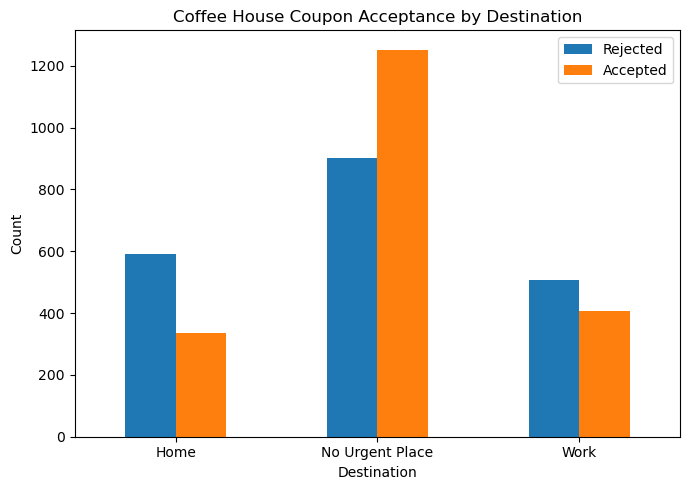

In [109]:
# Calculate acceptance rate by destination
rejected_coffee_house_coupon_df_by_destination = coffee_house_coupon_df.query('Y == 0')['destination'].value_counts()
accepted_coffee_house_coupon_df_by_destination = coffee_house_coupon_df.query('Y == 1')['destination'].value_counts()

accepted_rejected_df_combined_by_destination = pd.DataFrame({
    'Rejected': rejected_coffee_house_coupon_df_by_destination,
    'Accepted': accepted_coffee_house_coupon_df_by_destination
})

accepted_rejected_df_combined_by_destination.plot(kind='bar', figsize=(7, 5))
plt.title('Coffee House Coupon Acceptance by Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('images/coffee_house_coupon_acceptance_by_destination.png')
plt.show()

### Coffee house coupons accepted by occupation

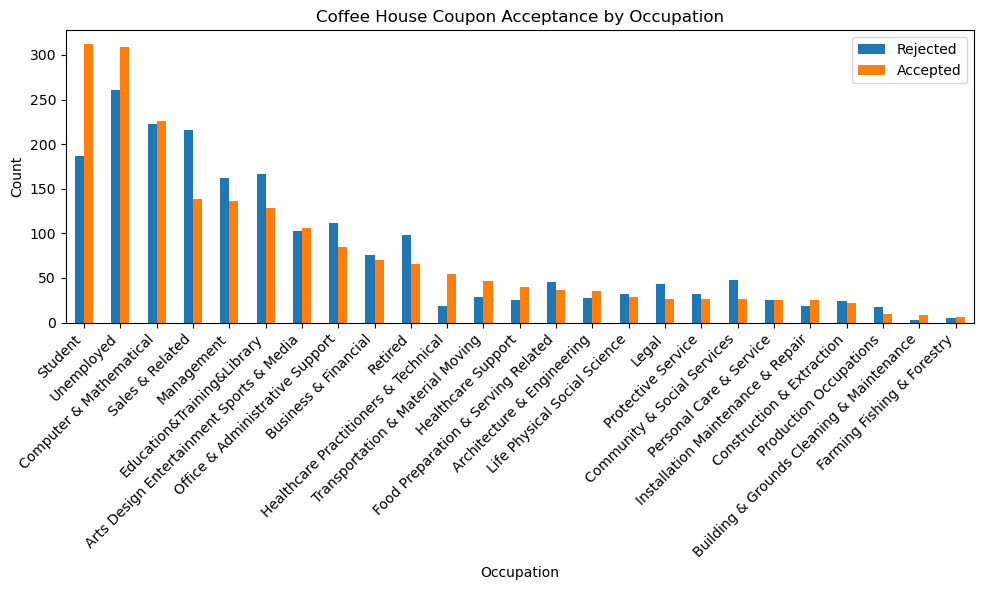

In [110]:
rejected_coffee_house_coupon_df_by_occupation = coffee_house_coupon_df.query('Y == 0')['occupation'].value_counts()
accepted_coffee_house_coupon_df_by_occupation = coffee_house_coupon_df.query('Y == 1')['occupation'].value_counts()

accepted_rejected_df_combined_by_occupation = pd.DataFrame({
    'Rejected': rejected_coffee_house_coupon_df_by_occupation,
    'Accepted': accepted_coffee_house_coupon_df_by_occupation
}).sort_values(by='Accepted', ascending=False)

accepted_rejected_df_combined_by_occupation.plot(kind='bar', figsize=(10, 6))
plt.title('Coffee House Coupon Acceptance by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('images/coffee_house_coupon_acceptance_by_occupation.png')
plt.show()


### Coffee house coupons accepted by age distribution

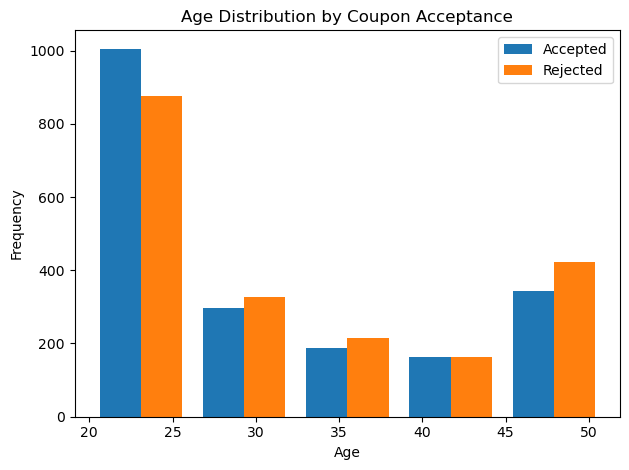

In [112]:
accepted = coffee_house_coupon_df.query('Y == 1')['age']
rejected = coffee_house_coupon_df.query('Y == 0')['age']

plt.hist([accepted, rejected], bins=5, label=['Accepted', 'Rejected'])
plt.title('Age Distribution by Coupon Acceptance')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.savefig('images/age_distribution_by_coffee_coupon_acceptance.png')
plt.show()

### General coupon acceptance rate

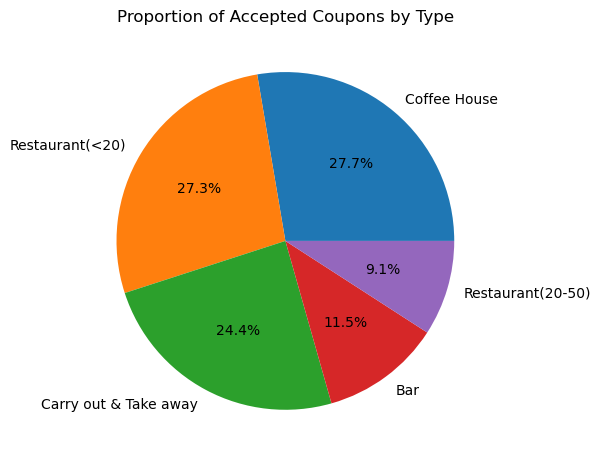

In [113]:
accepted = coupons_data_cleaned[coupons_data_cleaned['Y'] == 1]['coupon'].value_counts()
accepted.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Proportion of Accepted Coupons by Type')
plt.ylabel('')
plt.tight_layout()
plt.savefig('images/proportion_of_accepted_coupons_by_coupon_type.png')
plt.show()